## Problem Description
### TSS vs CHLA Plotting:

#### Objective:
To create a scatter plot comparing Total Suspended Solids (TSS) and Chlorophyll-a (CHLA) concentrations for different regions (Urban River, ETM Zone, and Bay Area) over specific months (May to July).
#### Data: 
The data is loaded from a MATLAB file (DE_TSSCHLA_clim.mat). Specific variables such as latitude (lats), longitude (lons), and CHLA and TSS concentrations for the three regions are extracted.
#### Visualization: 
A scatter plot is created to compare the CHLA and TSS values. Different colors and markers are used to distinguish between the regions. The plot includes a legend, custom x and y ticks, axis limits, and labels.

### Seasonal and Spatial Analysis of CHLA Concentrations:

#### Objective: 
To visualize the spatial distribution of water quality stations in Delaware Bay and analyze seasonal changes in CHLA concentrations across the three regions (Urban River, ETM Zone, and Bay Area) throughout the year.
#### Data: 
The same MATLAB file is used to extract latitude (lats), longitude (lons), and CHLA concentrations for the three regions. Monthly CHLA data is extracted for the entire year.
#### Visualization:
A map of Delaware Bay is created using the PlateCarree projection to show the locations of the water quality stations with labels for different regions.
Three subplots are created to show the seasonal changes in CHLA concentrations for each region. Each subplot includes custom x and y ticks, axis limits, and grid lines for clarity.
These visualizations provide insights into the spatial and temporal variations of water quality parameters, helping to understand the environmental conditions in different regions of Delaware Bay.

In [7]:
import os
os.chdir("/Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs")

dict_keys(['__header__', '__version__', '__globals__', 'BayArea_CHLA', 'BayArea_TSS', 'ETM_CHLA', 'ETM_TSS', 'UrbanRiver_CHLA', 'UrbanRiver_TSS', 'stnlats', 'stnlons'])


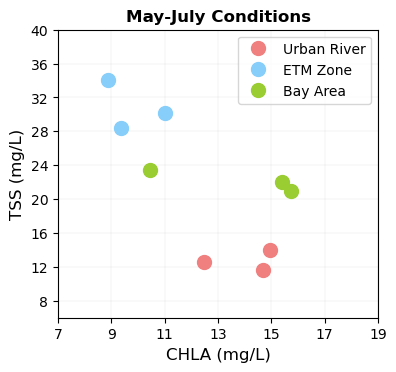

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import io
import sys

###############
## load data ##
###############
# fig option
is_frame = False 
# load mat file into memory
data = io.loadmat('./data/DE_TSSCHLA_clim.mat')
# check variable keys
print(data.keys())
# read desired variable
lats = np.array(data['stnlats'])
lons = np.array(data['stnlons'])
BA_CHLA  = np.array(data['BayArea_CHLA'])[4:7]
ETM_CHLA = np.array(data['ETM_CHLA'])[4:7]
UR_CHLA  = np.array(data['UrbanRiver_CHLA'])[4:7]
BA_TSS  = np.array(data['BayArea_TSS'])[4:7]
ETM_TSS = np.array(data['ETM_TSS'])[4:7]
UR_TSS  = np.array(data['UrbanRiver_TSS'])[4:7]
mons = np.arange(1,13,1)

###################
##  TSS vs CHLA  ##
###################
ax = plt.axes([0.2, 0.2, 0.5, 0.6])
if is_frame:
    # Frame only
    ffig = "./figures/HW1_fig3_frame.png"
    plt.plot( 0, 0,'o',markersize=10,color='lightcoral',label='Urban River')
    plt.plot( 0, 0,'o',markersize=10,color='lightskyblue',label='ETM Zone')
    plt.plot( 0, 0,'o',markersize=10,color='yellowgreen',label='Bay Area')
else:
    # TSS and CHLA data points
    ffig = "./figures/HW1_fig3_TSSvsCHLA.png"
    plt.plot( UR_CHLA, UR_TSS,'o',markersize=10,color='lightcoral',label='Urban River')
    plt.plot(ETM_CHLA,ETM_TSS,'o',markersize=10,color='lightskyblue',label='ETM Zone')
    plt.plot( BA_CHLA, BA_TSS,'o',markersize=10,color='yellowgreen',label='Bay Area')    
# set legend and grid
plt.legend(loc="upper right")
plt.grid(True,linewidth=0.1)
# Set custom xticks and yticks
ax.set_xticks(np.arange(1,20,2))
ax.set_yticks(np.arange(0,50,4))
ax.tick_params(labelsize=10)
# Set custom x-axis limits
ax.set_xlim(7,19)  # Adjust the limits as needed
ax.set_ylim(6,40)  # Adjust the limits as needed
# Add a title
plt.title("May-July Conditions",fontweight='bold')
# Add x,y labels
plt.xlabel("CHLA (mg/L)",fontsize=12)
plt.ylabel("TSS (mg/L)",fontsize=12)

#####################
##  Show the plot  ##
#####################
plt.savefig(ffig, bbox_inches="tight", dpi=300)
plt.show()


dict_keys(['__header__', '__version__', '__globals__', 'BayArea_CHLA', 'BayArea_TSS', 'ETM_CHLA', 'ETM_TSS', 'UrbanRiver_CHLA', 'UrbanRiver_TSS', 'stnlats', 'stnlons'])


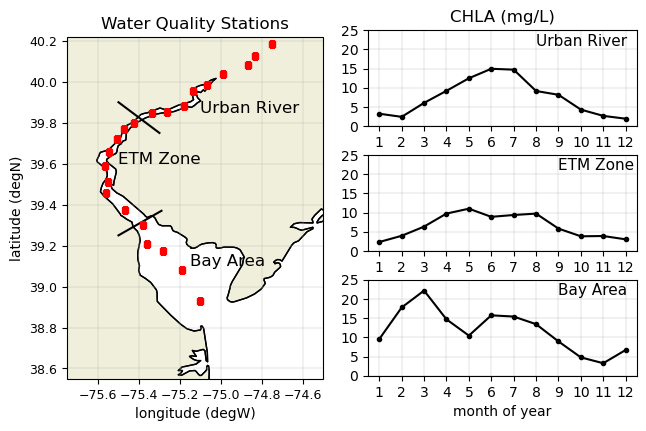

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import io
#import sys

###############
## load data ##
###############
# fig option
is_frame = False
# load mat file into memory
data = io.loadmat('./data/DE_TSSCHLA_clim.mat')
# check variable keys
print(data.keys())
# read desired variable
lats = np.array(data['stnlats'])
lons = np.array(data['stnlons'])
BA_CHLA  = np.array(data['BayArea_CHLA'])
ETM_CHLA = np.array(data['ETM_CHLA'])
UR_CHLA  = np.array(data['UrbanRiver_CHLA'])
mons = np.arange(1,13,1)
CHLAs = np.arange(0,30,5)
#sys.exit()

##############
##  DE map  ##
##############
# Create a map with the PlateCarree projection (lat/lon)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_position([0.1, 0.1, 0.4, 0.8])
# Set the extent to focus on Delaware Bay
extent = [-76.0, -73.0, 38.0, 40.5]
ax.set_extent(extent)
# Add coastline and land features for the region around Delaware Bay
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='black')
plt.plot([-75.50,-75.29],[39.25,39.37],'k-');
plt.plot([-75.3,-75.5 ],[39.75,39.90],'k-');
plt.plot(lons,lats,'rs',markersize=5)
plt.text(-75.1,39.85,'Urban River',fontsize=12)
plt.text(-75.5,39.60,'ETM Zone',fontsize=12)
plt.text(-75.15,39.1,'Bay Area',fontsize=12)
plt.grid(True,linewidth=0.25)
plt.xlabel("longitude (degW)") # sets the label to use for the x-axis
plt.ylabel("latitude (degN)") # sets the label to use for the y-axis
#plt.plot(-75.458484, 39.367644,'r*',markersize=15)  # 31DELRBC_WQX-091023_historical
#plt.plot(-75.271184, 39.181146,'b*',markersize=15)  # 31DELRBC_WQX-091026_historical
#plt.plot(-75.098552, 38.924862,'m*',markersize=15)  # 31DELRBC_WQX-091030_historical
# Add state boundaries for reference (optional)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
# Set custom xticks and yticks
ax.set_xticks(np.arange(-76,-72,0.2))
ax.set_yticks(np.arange(38.6,41.3,0.2))
ax.tick_params(labelsize=9)
# Set custom x-axis limits
ax.set_xlim(-75.75, -74.5)  # Adjust the limits as needed
ax.set_ylim( 38.55,  40.22)  # Adjust the limits as needed
# Add a title
plt.title("Water Quality Stations")

#######################
##  Seasonal Change  ##
#######################
if is_frame:
  ffig = "./figures/HW1_fig1_Frame.png"
else:
  ffig = "./figures/HW1_fig1_CHLA.png"
# Bay Area
ax = plt.axes([0.57, 0.15, 0.42, 0.20])
if not is_frame:
  plt.plot(mons,BA_CHLA,'ko-',markersize=3)
plt.xlabel("month of year")
plt.text(9,21,'Bay Area',fontsize=11)
plt.xticks(mons,fontsize=10)
plt.yticks(CHLAs,fontsize=10)
plt.xlim(0.5,12.5)
plt.ylim(0,25)
plt.grid(True,linewidth=0.25)
# ETM
ax = plt.axes([0.57, 0.41, 0.42, 0.20])
if not is_frame:
  plt.plot(mons,ETM_CHLA,'ko-',markersize=3)
plt.text(9,21,'ETM Zone',fontsize=11)
plt.xticks(mons,fontsize=10)
plt.yticks(CHLAs,fontsize=10)
plt.xlim(0.5,12.5)
plt.ylim(0,25)
plt.grid(True,linewidth=0.25)
# Urban River
ax = plt.axes([0.57, 0.67, 0.42, 0.20])
if not is_frame:
  plt.plot(mons,UR_CHLA,'ko-',markersize=3)
plt.title("CHLA (mg/L)")
plt.text(8,21,'Urban River',fontsize=11)
plt.xticks(mons,fontsize=10)
plt.yticks(CHLAs,fontsize=10)
plt.xlim(0.5,12.5)
plt.ylim(0,25)
plt.grid(True,linewidth=0.25)

#####################
##  Show the plot  ##
#####################
plt.savefig(ffig, bbox_inches="tight", dpi=300)
plt.show()
